In [1]:
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

In [36]:
df_original = pd.read_csv("cars-dataset.csv") 

In [37]:
df_original.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [38]:
df_original=df_original.drop('car name', axis=1)

In [39]:
df_original.isnull().sum()

cyl     0
disp    0
hp      0
wt      0
acc     0
yr      0
mpg     0
dtype: int64

In [40]:
df_original.describe()

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


Horspower is missing hence it must be having non-numeric values.

In [41]:
df_original.info() #The object  type suggest it is not numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null object
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 21.8+ KB


Not many float objects so not much file size

In [42]:
df_original.applymap(np.isreal).all() #From here you will come to know which columns are not having numeric values.

cyl      True
disp     True
hp      False
wt       True
acc      True
yr       True
mpg      True
dtype: bool

In [43]:
df_original.index[df_original['hp'].str.isnumeric() == False].tolist() #Checking the indeces of column where the value is non-numeric

[32, 126, 330, 336, 354, 374]

#or just
#df_original.index[df_original['hp'].str.isnumeric()==False]

In [44]:
print (df_original['hp'].iloc[32])
print (df_original['hp'].iloc[126])
print(df_original['hp'].iloc[330])
print(df_original['hp'].iloc[336])
print(df_original['hp'].iloc[354])
print(df_original['hp'].iloc[374])

?
?
?
?
?
?


In [45]:
df_original = df_original.replace('?', np.nan)
df_original = df_original.apply(lambda x: x.fillna(x.median()),axis=0)


# converting the hp column from object / string type to float
df_original['hp'] = df_original['hp'].astype('float64')

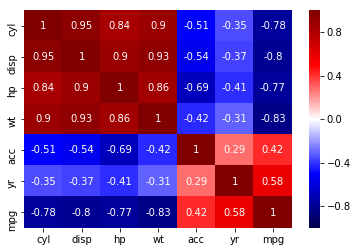

In [46]:
sns.heatmap(df_original.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

In [47]:
from scipy.stats import zscore

df_original_z=df_original.apply(zscore)

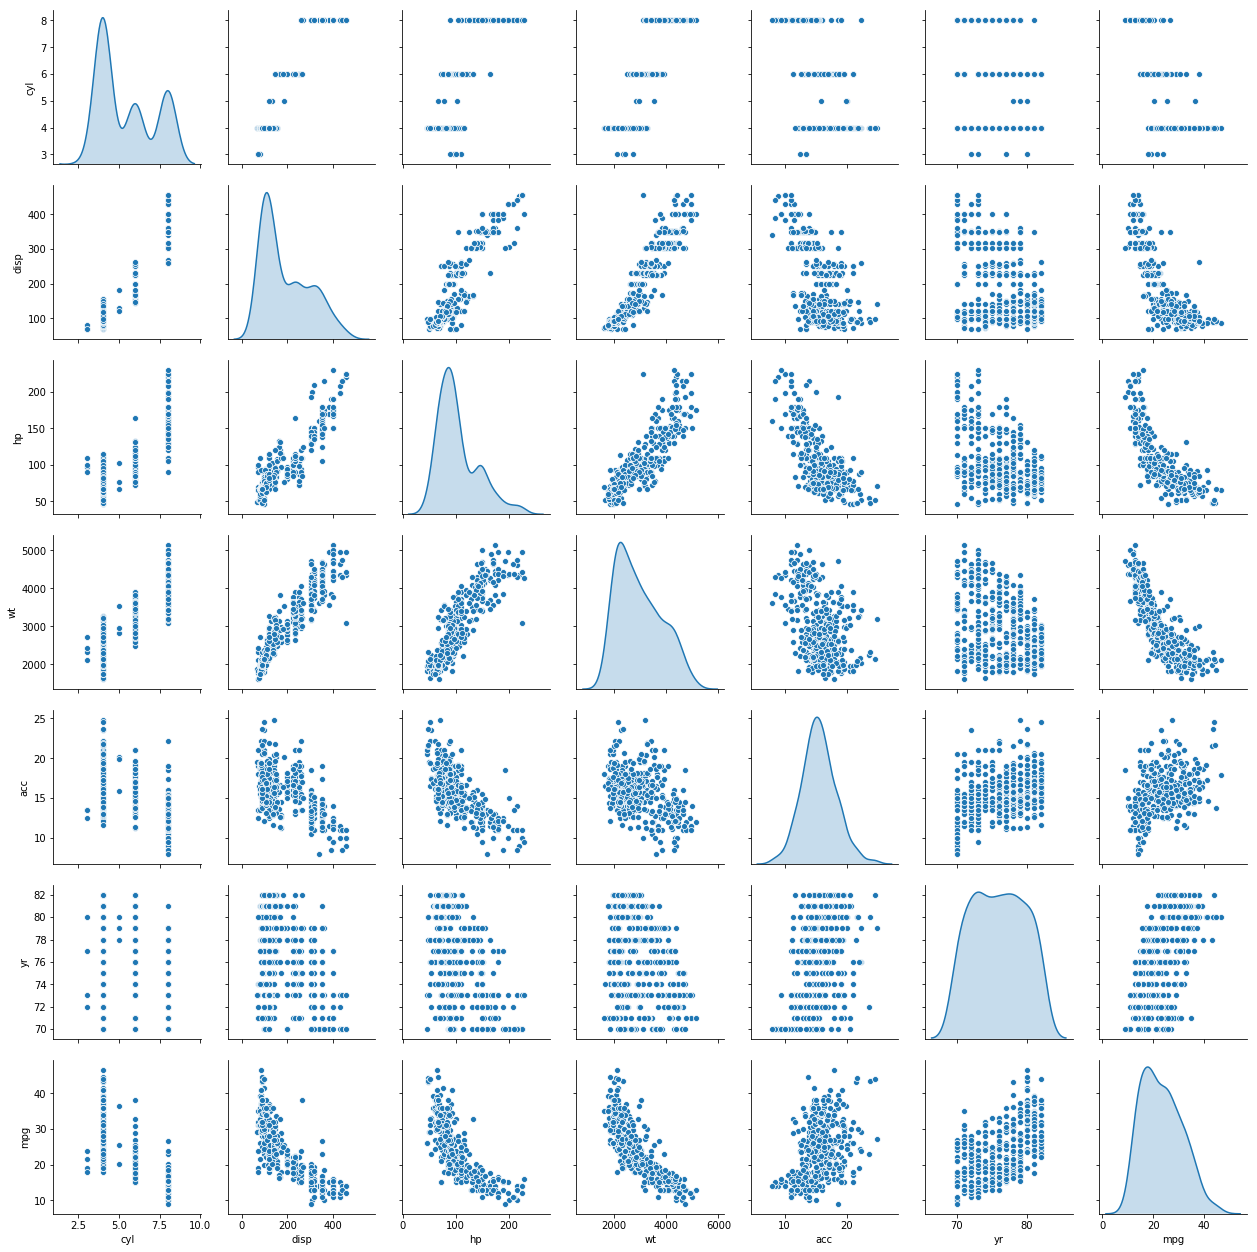

In [130]:
sns.pairplot(df_original,diag_kind='kde')

The first gaussian curve indicates three humps so the data must have gathered from three different process and not single.
Even the other gaussians suggests there are max three humps.
Horspower and displacement are linked.
From the diagram it seemed that acceleration decreased with increased in HP.
Also for low HP, displacement mpg will be high.

In [14]:
cluster_range = range( 3, 8)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 4)
  clusters.fit(df_original_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(df_original_z, labels, metric='euclidean'))






# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,3,946.019791,0.353148
1,4,738.392328,0.348449
2,5,665.643441,0.314884
3,6,598.919952,0.272383
4,7,540.740975,0.283252


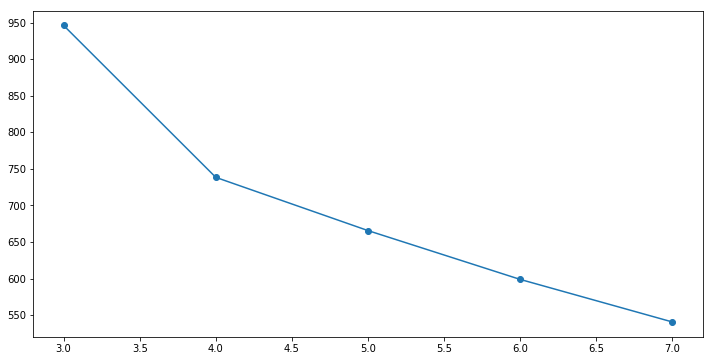

In [15]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [48]:
#Using K-means
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(df_original_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [49]:
prediction=cluster.predict(df_original_z)
df_original_z["GROUP"] = prediction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000294CA8200B8>,
      dtype=object)

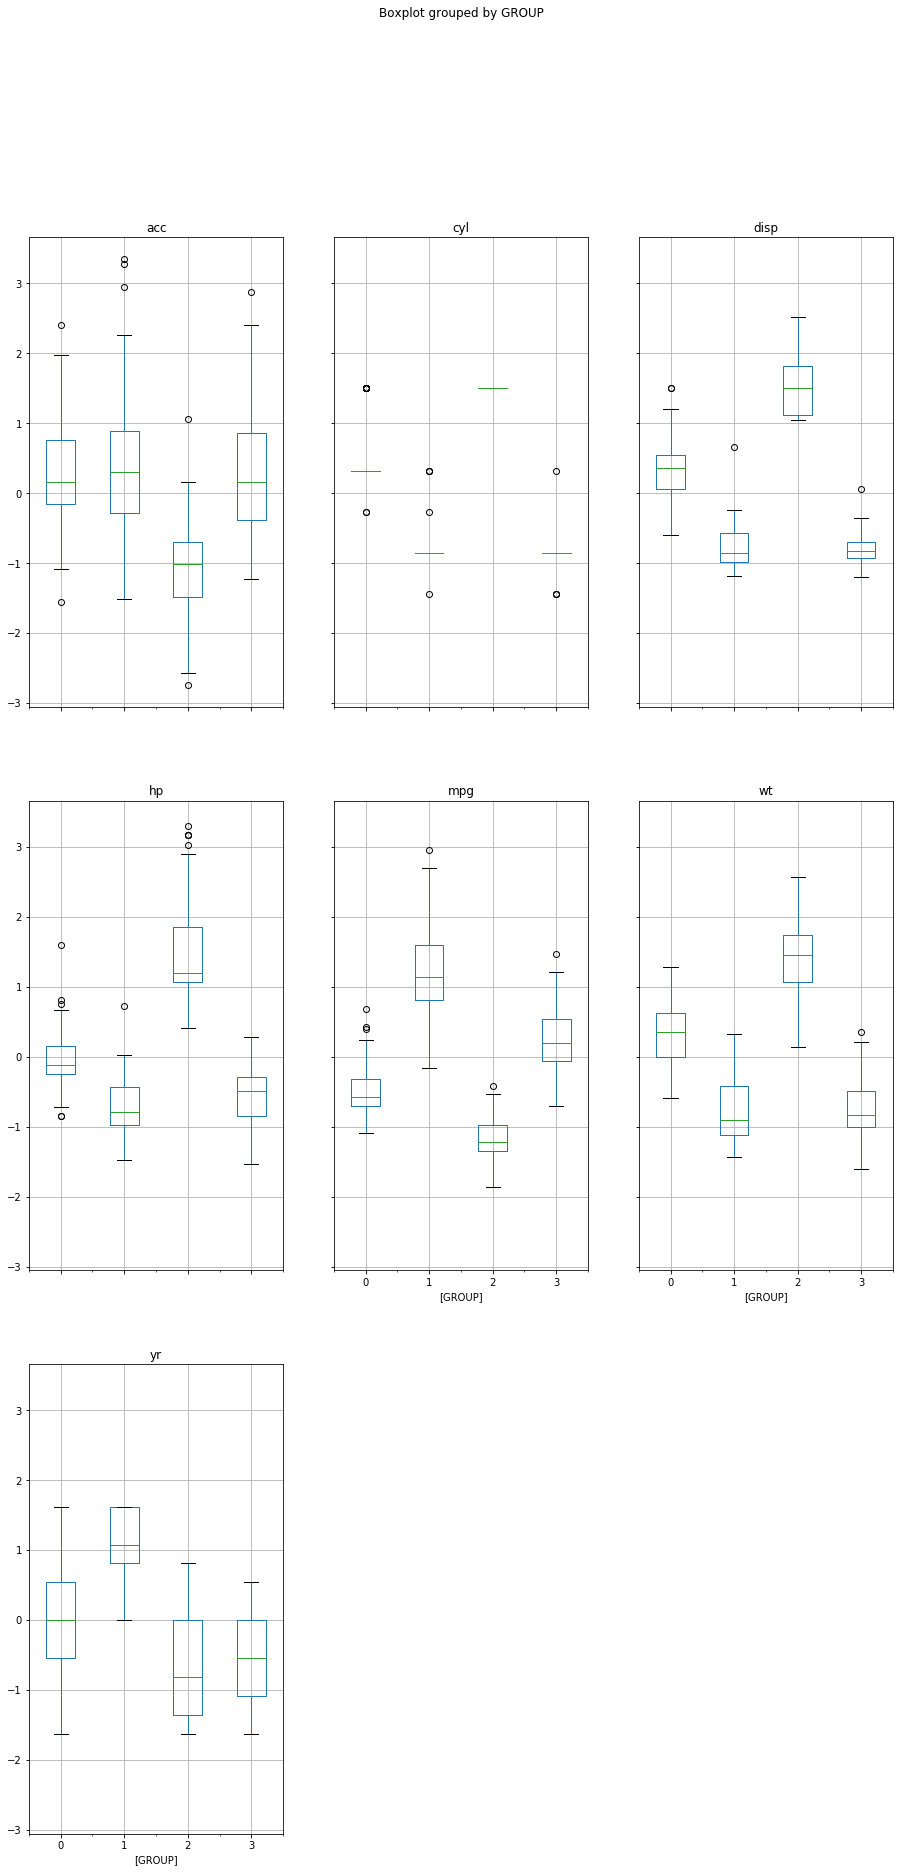

In [50]:
import matplotlib.pylab as plt

df_original_z.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))

mpg is clearly showing four clusters. Rest all diagrams shows overlapping of the clusters. Also boxplot shows there are few outliers here and there.

In [51]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')

In [52]:
model.fit(df_original_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4, pooling_func='deprecated')

In [53]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
Z = linkage(df_original_z, 'average')
c, coph_dists = cophenet(Z , pdist(df_original_z))

c

0.8308107417767772

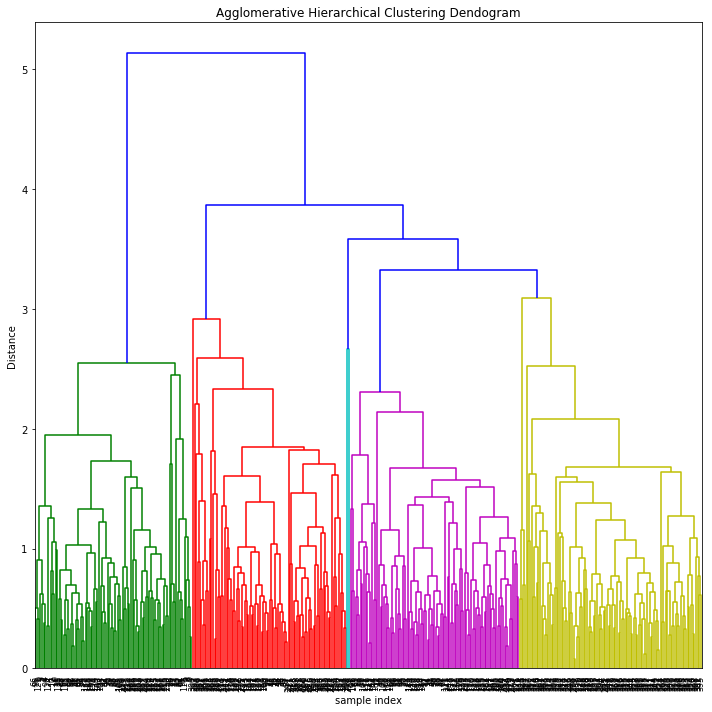

In [54]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 3.2, leaf_font_size=8. )
plt.tight_layout()

In [55]:
df_original_z.head(20)

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,2
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,2
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,2
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,2
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,2
5,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.627426,-1.090751,2
6,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.627426,-1.218855,2
7,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.627426,-1.218855,2
8,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.627426,-1.218855,2
9,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.627426,-1.090751,2


In [29]:
#Seperating them into unique groups or clusters based upon labels

In [30]:
df_original_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
cyl      398 non-null float64
disp     398 non-null float64
hp       398 non-null float64
wt       398 non-null float64
acc      398 non-null float64
yr       398 non-null float64
mpg      398 non-null float64
GROUP    398 non-null int32
dtypes: float64(7), int32(1)
memory usage: 23.4 KB


In [31]:
df_original_z.GROUP.unique()

array([2, 3, 0, 1], dtype=int64)

In [87]:
df_original_z.groupby('GROUP').count()

,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,
0,91,91,91,91,91,91,91
1,111,111,111,111,111,111,111
2,94,94,94,94,94,94,94
3,102,102,102,102,102,102,102


In [60]:
grp_0=df_original_z[df_original_z.GROUP==0]
grp_0.drop('GROUP',axis=1,inplace=True)

F:\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [61]:
grp_1=df_original_z[df_original_z.GROUP==1]
grp_1.drop('GROUP',axis=1,inplace=True)

F:\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [62]:
grp_2=df_original_z[df_original_z.GROUP==2]
grp_2.drop('GROUP',axis=1,inplace=True)

F:\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [63]:
grp_3=df_original_z[df_original_z.GROUP==3]
grp_3.drop('GROUP',axis=1,inplace=True)

F:\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
x0=grp_0.iloc[:,0:-1]
y0=grp_0.iloc[:,-1]

In [75]:
reg0= LinearRegression().fit(x0, y0)

In [76]:
reg0.coef_

array([ 0.18477201, -0.01812364, -0.14785468, -0.3975787 , -0.06247571,
        0.22975091])

In [77]:
x1=grp_0.iloc[:,0:-1]
y1=grp_0.iloc[:,-1]

In [78]:
reg1 = LinearRegression().fit(x1, y1)

In [79]:
reg1.coef_

array([ 0.18477201, -0.01812364, -0.14785468, -0.3975787 , -0.06247571,
        0.22975091])

In [80]:
x2=grp_0.iloc[:,0:-1]
y2=grp_0.iloc[:,-1]

In [81]:
reg2 = LinearRegression().fit(x2, y2)

In [82]:
reg2.coef_

array([ 0.18477201, -0.01812364, -0.14785468, -0.3975787 , -0.06247571,
        0.22975091])

In [83]:
x3=grp_0.iloc[:,0:-1]
y3=grp_0.iloc[:,-1]

In [84]:
reg3 = LinearRegression().fit(x3, y3)

In [85]:
reg3.coef_

array([ 0.18477201, -0.01812364, -0.14785468, -0.3975787 , -0.06247571,
        0.22975091])